In [1]:
import pickle
from matplotlib import pyplot as plt
import numpy as np 
import scipy.stats
import os

#https://stackoverflow.com/questions/15033511/compute-a-confidence-interval-from-sample-data
def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n - 1)
    return m, m - h, m + h

def set_dict_entry(dictionary, keys, value):
    for key in keys[:-1]:
        dictionary = dictionary.setdefault(key, {})
    dictionary[keys[-1]] = value
    
def dict_iterator(dictionary, keys=None):
    if keys is None:
        keys = []
    for key, value in dictionary.items():
        new_keys = keys + [key]
        if isinstance(value, dict):
            for pair in dict_iterator(value, keys=new_keys):
                yield pair
        else:
            yield [new_keys, value]
            
def get_CI(dictionary):
    to_return = {}
    for val in dict_iterator(dictionary):
        utilities = val[1]
        set_dict_entry(to_return, val[0], mean_confidence_interval(utilities))
    return to_return

In [6]:
dir = 'Results/'
results = {}
for file in os.scandir(dir):
    if file.name.endswith('.p'):
        tokens = file.name[:-2].split('_')
        with open(os.path.join(dir, file.name), 'rb') as input_file:
            value = pickle.load(input_file)
        set_dict_entry(results, [tokens[0], tokens[-1]], value)
print(results)

CI_dict = get_CI(results)

print(CI_dict)              

{'gaggle': {'100': [2.9546115398406982, 2.158503532409668, 2.130869150161743, 2.072458505630493, 2.0690908432006836, 2.0999715328216553, 2.0664165019989014, 2.0675156116485596, 2.0960006713867188], '10': [1.2465956211090088, 0.2669677734375, 0.2693147659301758, 0.25305938720703125, 0.2557182312011719, 0.24970436096191406, 0.2659342288970947, 0.3301248550415039, 0.2474377155303955], '1000': [21.605700492858887, 20.49996852874756, 20.403455018997192, 20.442477226257324, 20.360730409622192, 20.41797661781311, 20.434115648269653, 20.337665796279907, 20.430952787399292], '32': [1.597367525100708, 0.6909322738647461, 0.7008800506591797, 0.6983540058135986, 0.794532299041748, 0.6877093315124512, 0.7185389995574951, 0.6827287673950195, 0.7755696773529053], '320': [7.502727508544922, 6.581867694854736, 6.546981573104858, 6.6005494594573975, 6.470765113830566, 6.52304744720459, 6.5270185470581055, 6.547128200531006, 6.548210859298706]}}
{'gaggle': {'100': (2.1906042098999023, 1.9690251731123103,

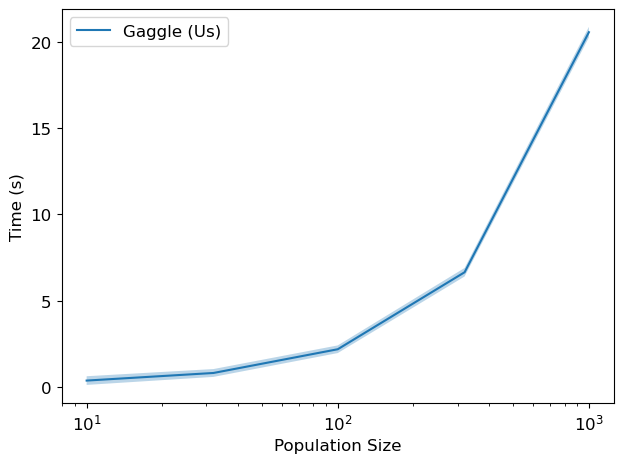

<Figure size 640x480 with 0 Axes>

In [8]:
pop_sizes = [10, 32, 100, 320, 1000]
plt.rcParams.update({'font.size': 12})

nice_names = {'gaggle':'Gaggle (Us)', 'leap': 'LEAP on GPU', 'pygad': 'PyGAD on GPU'}
for algorithm in CI_dict:
    result = CI_dict[algorithm]
    values = [result[str(x)][0] for x in pop_sizes]
    lower = [result[str(x)][1] for x in pop_sizes]
    upper = [result[str(x)][2] for x in pop_sizes]
    plt.semilogx(pop_sizes, values, label=nice_names[algorithm])
    plt.fill_between(pop_sizes, lower, upper, alpha=0.3)
        
# plt.title("{} Dataset".format(dataset))
plt.xlabel("Population Size")
plt.ylabel("Time (s)")
plt.tight_layout()
plt.legend()
plt.plot()
plt.savefig('Results/mnist_plot.png', bbox_inches='tight')
plt.show()
plt.clf()